In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastbook import *
from fastai.vision.widgets import *

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/fastbook/__init__.py:21: UserWarning: Missing `graphviz` - please run `conda install fastbook`
  except ModuleNotFoundError: warn("Missing `graphviz` - please run `conda install fastbook`")


In [2]:
aaf_url = 'https://www.dropbox.com/s/a0lj1ddd54ns8qy/All-Age-Faces%20Dataset.zip'
!wget $aaf_url -P 'data'

--2020-08-29 00:36:25--  https://www.dropbox.com/s/a0lj1ddd54ns8qy/All-Age-Faces%20Dataset.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.1, 2620:100:6016:1::a27d:101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/a0lj1ddd54ns8qy/All-Age-Faces%20Dataset.zip [following]
--2020-08-29 00:36:25--  https://www.dropbox.com/s/raw/a0lj1ddd54ns8qy/All-Age-Faces%20Dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucf14039ccc5b9ada4905f2878d8.dl.dropboxusercontent.com/cd/0/inline/A-Whjnuz_6pkss2R8-UFjacbTxekQ0ddz4RqPsM4cnYX6Ufjznfoe3Lyq3x5G7e3XJWW6ztXtNehi8GnM555A5KSzRa3Ufcw2acxcY1Na0_FJg/file# [following]
--2020-08-29 00:36:25--  https://ucf14039ccc5b9ada4905f2878d8.dl.dropboxusercontent.com/cd/0/inline/A-Whjnuz_6pkss2R8-UFjacbTxekQ0ddz4RqPsM4cnYX6Ufjznfoe3Lyq3x5G7e3XJWW6ztXtNehi8GnM555A5KSzR

In [3]:
import zipfile
with zipfile.ZipFile('data/All-Age-Faces Dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('data/aaf/')

KeyboardInterrupt: 

In [8]:
fnames = get_image_files('data/aaf/All-Age-Faces Dataset/aglined faces')

In [9]:
dblock = DataBlock()

In [10]:
dsets = dblock.datasets(fnames)

In [19]:
def label_func(fname):
    return int(fname.name[-6:-4])

In [38]:
dblock = DataBlock( blocks = (ImageBlock, RegressionBlock), 
                    get_items = get_image_files,
                    get_y     = label_func,
                    splitter  = RandomSplitter(),
                    item_tfms = Resize(224))

dsets = dblock.datasets('data/aaf/All-Age-Faces Dataset/aglined faces')
dsets.train[0]

(PILImage mode=RGB size=309x393, tensor(20.))

In [39]:
dls = dblock.dataloaders(Path('data/aaf/All-Age-Faces Dataset/aglined faces'))

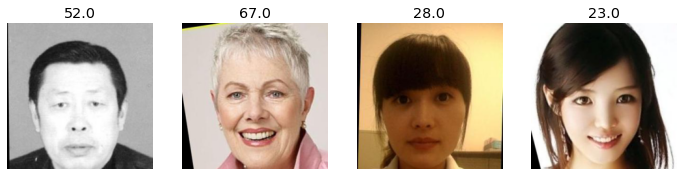

In [40]:
dls.valid.show_batch(max_n=4, nrows=1)

In [ ]:
git config --global user.email "you@example.com"